
## Building Neural network

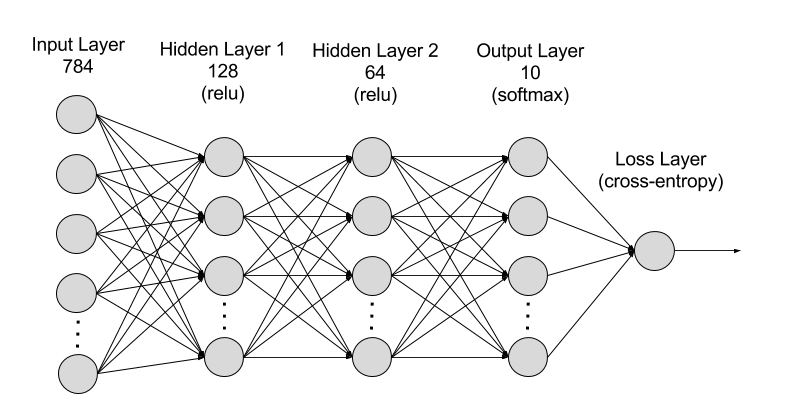
 Create a network with 784 input units, a hidden layer with 128 units and a ReLU activation, then a hidden layer with 64 units and a ReLU activation, and finally an output layer with a softmax activation as shown above. You can use a ReLU activation with the nn.ReLU module or F.relu function.

In [2]:
# Gathering data 
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import matplotlib.pyplot as plt

from torchvision import datasets , transforms

transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
#Batch size determines we are getting 64 images at once 
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

dataiter = iter(trainloader)
images, labels = dataiter.next()

# Inputs in actual images for digit classification
inputs = images.view(64,784)

In [3]:
from torch import nn
import torch.nn.functional as F


In [4]:
# Making model - this model gives random probabilities and has not been trained yet.
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.hidden1 = nn.Linear(784,128)
        self.hidden2 = nn.Linear(128,64)
        self.output = nn.Linear(64,10)
        
    def forward(self,x):
        x = self.hidden1(x)
        x = F.relu(x)
        x = F.relu(self.hidden2(x))
        x = F.softmax(x,dim=1)
        
        return x

In [5]:
model = Network()
result = model.forward(inputs)

print(result.sum(dim=1))

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000], grad_fn=<SumBackward2>)


### Initializing weights and biases
The weights are automatically initialized, but it's possible to customize

**model.fc1.weight** return weights attached to layer for current instance.


For custom initialization, we want to modify these tensors in place. These are actually autograd Variables, 
so we need to get back the actual tensors with model.fc1.weight.data. Once we have the tensors,
we can fill them with zeros (for biases) or random normal values.

In [19]:
# Return weights and bias for current layer
print(model.fc1.weight)
print(model.fc1.bias)
'''
    Change them by following way 
         
    # Set biases to all zeros
    model.fc1.bias.data.fill_(0)

    # sample from random normal with standard dev = 0.01# sampl 
    model.fc1.weight.data.normal_(std=0.01)
'''

Parameter containing:
tensor([[ 0.0198,  0.0355,  0.0347,  ..., -0.0292,  0.0302,  0.0333],
        [-0.0309, -0.0161,  0.0329,  ..., -0.0146, -0.0318,  0.0028],
        [ 0.0078, -0.0287,  0.0054,  ...,  0.0319,  0.0334, -0.0291],
        ...,
        [ 0.0040, -0.0120, -0.0149,  ...,  0.0101, -0.0041, -0.0310],
        [-0.0142, -0.0214,  0.0074,  ..., -0.0027, -0.0321,  0.0113],
        [-0.0226,  0.0048,  0.0278,  ..., -0.0070, -0.0098,  0.0173]],
       requires_grad=True)
Parameter containing:
tensor([-0.0223, -0.0199, -0.0334,  0.0075, -0.0151,  0.0207,  0.0039,  0.0329,
         0.0029, -0.0196, -0.0329,  0.0270,  0.0298, -0.0263, -0.0185,  0.0251,
         0.0333, -0.0271,  0.0345, -0.0269,  0.0078,  0.0297, -0.0063, -0.0143,
        -0.0007, -0.0281, -0.0212, -0.0277, -0.0225, -0.0177,  0.0203,  0.0292,
         0.0311,  0.0350,  0.0111, -0.0282, -0.0100, -0.0085, -0.0303, -0.0126,
        -0.0219,  0.0259, -0.0155, -0.0074,  0.0132,  0.0278,  0.0252, -0.0182,
        -0.0039

'\n    Change them by following way \n         \n    # Set biases to all zeros\n    model.fc1.bias.data.fill_(0)\n\n    # sample from random normal with standard dev = 0.01# sampl \n    model.fc1.weight.data.normal_(std=0.01)\n'

## Using nn.Sequential
PyTorch provides a convenient way to build networks like this where a tensor is passed sequentially through operations, nn.Sequential.


In [9]:

# Hyperparameters for our network# Hyper 
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)


### OrderedDict
You can also pass in an OrderedDict to name the individual layers and operations, instead of using incremental integers. Note that dictionary keys must be unique, so each operation must have a different name.


Now you can access layers either by integer or the name


In [12]:

from  collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax()
)

In [13]:
print(model[0])
print(model.fc1)

Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)
